In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
df=pd.read_csv('vadu-dummy-data.csv',header=1)
df.head()
unique=np.array([df['Class'].unique()])
print(unique)#found out there are three classes
df=df.drop(columns='SampleID')


[['Vata' 'Kapha' 'Pitta']]


In [19]:
df=df.replace('NA',np.nan)#replaced with actual nan values 
#had to do this else the labelencoder would encode NA as a value as well

In [20]:
# labelencoding on all since i am using random forest model
labels=LabelEncoder()
for i in df.columns:
    df[i]=labels.fit_transform(df[i])
print(df)

     Class  GENDER  F1  F2  F3  F4  ...  F127  F128  F129  F130  F131  F132
0        2       1   1   2   0   0  ...     1     1     1     1     1     0
1        0       1   2   0   0   1  ...     1     1     0     1     0     0
2        2       1   1   2   0   3  ...     0     1     1     0     1     1
3        2       1   1   2   0   2  ...     0     1     1     1     0     1
4        0       1   2   0   0   0  ...     1     1     0     0     0     0
..     ...     ...  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   ...
126      2       0   1   2   1   3  ...     1     1     1     1     0     1
127      2       0   1   2   1   3  ...     0     0     0     0     0     0
128      2       0   1   2   2   1  ...     1     1     0     0     0     0
129      2       0   1   1   1   3  ...     1     0     1     0     0     1
130      1       0   0   1   2   3  ...     1     0     1     1     0     0

[131 rows x 134 columns]


In [21]:
#replace na values in each row with its mode
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [22]:
#train test split
X=df.drop(columns='Class')
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
import time
model_normal=RandomForestClassifier(n_estimators=100,random_state=42)

#added to check time taken to train the model
starttime=time.time()
model_normal.fit(X_train,y_train)
endtime=time.time()

pred=model_normal.predict(X_test)
print(unique)
print(pred)
print('for normal model')
print(endtime-starttime)

[['Vata' 'Kapha' 'Pitta']]
[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
for normal model
0.08799910545349121


In [37]:
from sklearn.metrics import r2_score
acc=accuracy_score(y_test,pred)
r21=r2_score(y_test,pred)
print(acc)
print(r21)

0.9259259259259259
0.8836206896551724


In [25]:
y_pred=model_normal.predict(X_test)
print(y_pred)

[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]


In [26]:
#creating a model which uses parallel execution using all the CPU cores
model_para=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=2)
#-1 to use all cores of the cpu

#to check the time taken
start=time.time()
model_para.fit(X_train,y_train)
end=time.time()

para_pred=model_para.predict(X_test)
print(unique)
print(para_pred)
print("for parallel model")
print(end-start)

[['Vata' 'Kapha' 'Pitta']]
[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
for parallel model
0.1083230972290039


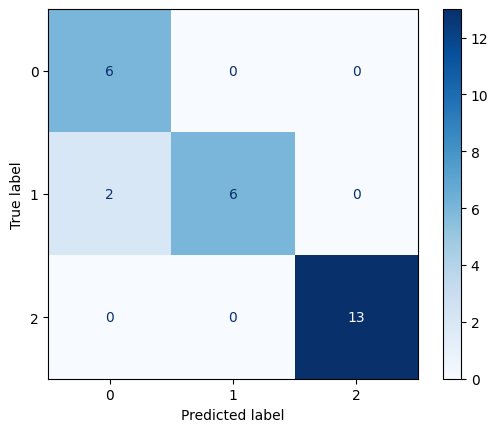

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues',values_format='d')

 

In [34]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print(y_pred)
acc2=accuracy_score(y_test,y_pred1)
r22=r2_score(y_test,y_pred1)
print(acc2)
print(r22)

[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
0.9259259259259259
0.8836206896551724


In [33]:
#Support vector machine
from sklearn.svm import SVC
model2=SVC(kernel='rbf',C=1,gamma='auto')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
acc3=accuracy_score(y_test,y_pred2)
r23=r2_score(y_test,y_pred2)
print(acc3)
print(r23)


0.8888888888888888
0.8254310344827587


In [ ]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=12)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
acc4=accuracy_score(y_test,y_pred3)
r24=r2_score(y_test,y_pred3)
print(acc4)
print(r24)

0.8254310344827587
0.8888888888888888


In [31]:
#multilayered perceptron
from sklearn.neural_network import MLPClassifier

model4=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500,random_state=42)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
acc5=accuracy_score(y_test,y_pred4)
print(acc5)
r25=r2_score(y_test,y_pred4)
print(r25)


0.8888888888888888
0.8254310344827587


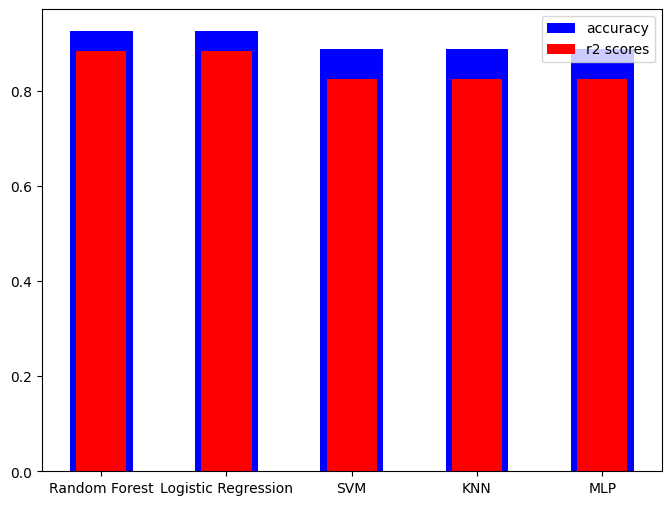

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
accuracies = [acc,acc2,acc3,acc4,acc5]
models = ["Random Forest", "Logistic Regression", "SVM", "KNN", "MLP"]
r2scores=[r21,r22,r23,r24,r25]
plt.bar(models,accuracies,color='blue',label='accuracy',width=0.5)
plt.bar(models,r2scores,color='red',label='r2 scores',width=0.4)
plt.legend(loc='best')